In [276]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



Assignment: https://github.com/GalvanizeDataScience/gradient-descent/blob/g91-sea/assignment.md

Lecture: https://github.com/GalvanizeDataScience/lectures/blob/SF/gradient_descent/Gradient%20Descent.ipynb

Resource: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

Resource: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

# Gradient Descent
We will be implementing logistic regression using the gradient descent algorithm.


## Part 1: Create Data
1. Generate a dataset using sklearn's make_classification module.


In [277]:
X, y = make_classification(n_samples=100,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            random_state=0)

2. We use two features so that we can visualize our data. Make a scatterplot with the first feature on the horizontal axis and the second on the vertical axis. Depict the two categories using different colors or different symbols.

In [278]:
feat_1 = X[:,0]
feat_2 = X[:,1]

In [279]:
feat_1

array([-0.76605469, -0.92038325, -0.98658509,  1.70910242,  1.9876467 ,
        3.86274219, -1.12836011, -1.10074198, -1.53716448, -0.32372692,
       -1.28532883,  3.35973253, -1.27034986, -0.71023363, -1.12933108,
        0.24820673, -2.47263494, -1.11573423, -1.2141474 , -1.25860859,
       -0.53583409,  0.92328145,  2.02751248,  2.1871814 ,  0.51281456,
       -2.8118071 ,  0.31338067,  0.27299061, -1.18986266, -0.11213297,
        1.23567148, -0.70329192,  1.3382818 , -3.19826339,  0.76438953,
        0.95252962, -0.43793316,  2.40620516,  0.68152068,  0.45139447,
       -1.45709006,  1.69989125, -0.98035846, -0.26822526, -1.85016853,
       -0.10789457,  1.27458364, -0.44736931, -0.00811816, -2.22244349,
       -0.89436588, -0.2415271 ,  0.85041166, -1.06938289, -0.99510532,
       -0.83183986, -1.24743076,  1.22964368, -0.90014214,  0.5710682 ,
        0.21654345, -0.15902752, -0.59732184,  1.04421447,  0.95508388,
       -0.90334395, -1.27395967,  0.25020227, -0.89552621, -1.17

In [280]:
def plot_classification_date(X, y, ax):
    # pass a class into an array of indices corresponding to it
    colors = np.array(['Red','blue'])[y]
    ax.scatter(X[:,0], X[:,1], c=colors)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('Feature 1 vs Feature 2')

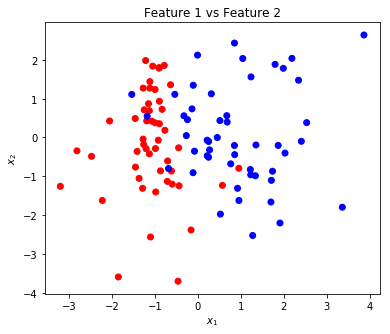

In [281]:
fig, ax = plt.subplots(1, figsize=(6,5))
plot_classification_date(X, y, ax)

3. Just by eye-balling, make an estimate for a decision boundary of the form `x_2 = m*x_1 + b`. (Note that we haven't fit a logistic regression to this yet, but if we did, the line of constant `p=0.5` has `m = -beta_1 / beta_2` and `b = -beta_0 / beta_2`.)

## Part 2: Cost function


2. Using the data above, compute the gradient of the cost function ∇J(β).

In [282]:
# partial derivative of the cost function with respect to feature dimension 1 and 2
# this is the gradient of the cost function
np.dot(feat_1, (-y + 1/(1 + np.exp(-(1 + feat_1 + feat_2))))), np.dot(feat_2, (-y + 1/(1 + np.exp(-(1 + feat_1 + feat_2)))))

(-26.073829269416294, 17.211790222493292)

In [283]:
1 / (1+ np.exp(-(1 + feat_1 + feat_2)))

array([0.6028298 , 0.50182498, 0.4320468 , 0.83265515, 0.99153984,
       0.99944501, 0.36560421, 0.06530378, 0.63826969, 0.77426332,
       0.16888916, 0.92855284, 0.73055782, 0.30136302, 0.6360662 ,
       0.67664895, 0.12354852, 0.78884327, 0.8535652 , 0.39138239,
       0.82794781, 0.64911399, 0.93240639, 0.9946172 , 0.87498895,
       0.10364684, 0.91939206, 0.72149416, 0.55835348, 0.49516755,
       0.97792359, 0.4234302 , 0.79448078, 0.03060277, 0.74739966,
       0.76116177, 0.33587877, 0.96463523, 0.88849175, 0.809832  ,
       0.50739724, 0.73857799, 0.2005553 , 0.68517726, 0.01168478,
       0.90314619, 0.43855912, 0.57066859, 0.95720225, 0.05503507,
       0.73799712, 0.77107998, 0.83782046, 0.58608337, 0.7750144 ,
       0.70885501, 0.61343774, 0.78041769, 0.86763784, 0.58380041,
       0.75859338, 0.17656559, 0.31035371, 0.98326218, 0.58254794,
       0.86888172, 0.42122565, 0.75865876, 0.61198107, 0.59039673,
       0.37906234, 0.80105282, 0.99193301, 0.38241716, 0.99075

In [284]:
np.sum(X, axis=1)

array([-5.82730013e-01, -9.92700057e-01, -1.27350509e+00,  6.04562907e-01,
        3.76389149e+00,  6.49600132e+00, -1.55112169e+00, -3.66117173e+00,
       -4.32138008e-01,  2.32542821e-01, -2.59352054e+00,  1.56466909e+00,
       -2.54546376e-03, -1.84081570e+00, -4.41669315e-01, -2.61585983e-01,
       -2.95924740e+00,  3.17966981e-01,  7.62841620e-01, -1.44150512e+00,
        5.71152282e-01, -3.84853058e-01,  1.62425537e+00,  4.21914965e+00,
        9.45809093e-01, -3.15734516e+00,  1.43411550e+00, -4.81147606e-02,
       -7.65517578e-01, -1.01933040e+00,  2.79092208e+00, -1.30870772e+00,
        3.52149238e-01, -4.45558408e+00,  8.47915179e-02,  1.59059430e-01,
       -1.68171443e+00,  2.30603403e+00,  1.07542675e+00,  4.48918933e-01,
       -9.70408872e-01,  3.85907224e-02, -2.38282732e+00, -2.22332164e-01,
       -5.43771475e+00,  1.23268168e+00, -1.24701186e+00, -7.15420520e-01,
        2.10752918e+00, -3.84317723e+00,  3.55844421e-02,  2.14419397e-01,
        6.42099861e-01, -

In [285]:
def predict_proba(X, coeffs):
    """Calculate the predicted conditional probabilities (floats between 0 and
    1) for the given data with the given coefficients.

    Parameters
    ----------
    X: np.array of shape (n_samples, n_features)  
        The data (independent variables) to use for prediction.
    coeffs: np.array of shape (n_features, )
        The hypothesized coefficients.  Note that the shape of X, and coeffs

    Returns
    -------
    predicted_probabilities: 
        The conditional probabilities given the data and coefficients.
    """
    return 1/(1+np.exp(-(1 + np.sum(X*coeffs, axis=1))))


In [286]:
def predict(X, coeffs, thresh=0.5):
    """
    Calculate the predicted class labels (0 or 1) for the given data with the
    given coefficients by comparing the predicted probabilities to a given
    threshold.

    Parameters
    ----------
    X: np.array of shape (n_samples, n_features)  
        The data (independent variables) to use for prediction.
    coeffs: np.array of shape (n_features, )
        The hypothesized coefficients.  Note that the shape of X, and coeffs
        must align.
    thresh: float
        Threshold for classification.

    Returns
    -------
    predicted_class: int
        The predicted class.
    """
    predictions = predict_proba(X, coeffs)
    predictions[np.where(predictions > thresh)] = 1
    predictions[np.where(predictions < thresh)] = 0
    return predictions

In [287]:
test = predict_proba(X, coeffs=1)

In [288]:
test

array([0.6028298 , 0.50182498, 0.4320468 , 0.83265515, 0.99153984,
       0.99944501, 0.36560421, 0.06530378, 0.63826969, 0.77426332,
       0.16888916, 0.92855284, 0.73055782, 0.30136302, 0.6360662 ,
       0.67664895, 0.12354852, 0.78884327, 0.8535652 , 0.39138239,
       0.82794781, 0.64911399, 0.93240639, 0.9946172 , 0.87498895,
       0.10364684, 0.91939206, 0.72149416, 0.55835348, 0.49516755,
       0.97792359, 0.4234302 , 0.79448078, 0.03060277, 0.74739966,
       0.76116177, 0.33587877, 0.96463523, 0.88849175, 0.809832  ,
       0.50739724, 0.73857799, 0.2005553 , 0.68517726, 0.01168478,
       0.90314619, 0.43855912, 0.57066859, 0.95720225, 0.05503507,
       0.73799712, 0.77107998, 0.83782046, 0.58608337, 0.7750144 ,
       0.70885501, 0.61343774, 0.78041769, 0.86763784, 0.58380041,
       0.75859338, 0.17656559, 0.31035371, 0.98326218, 0.58254794,
       0.86888172, 0.42122565, 0.75865876, 0.61198107, 0.59039673,
       0.37906234, 0.80105282, 0.99193301, 0.38241716, 0.99075

In [289]:
test[np.where(test > 0.5)] = 1
test[np.where(test < 0.5)] = 0

In [290]:
test

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.])

In [291]:
predict(X, coeffs = 1)

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.])

In [292]:
def cost(X, y, coeffs):
    """
    Calculate the total logistic cost function of the data with the given
    coefficients.

    Parameters
    ----------
    X: np.array of shape (n_samples, n_features)  
        The data (independent variables) to use for prediction.
    y: np.array of shape (n_samples, )
        The actual class values of the response.  Must be encoded as 0's and
        1's.  Also, must align properly with X and coeffs.
    coeffs: np.array of shape (n_features, )
        The hypothesized coefficients.  Note that the shape of X, y, and coeffs
        must align.

    Returns
    -------
    logistic_cost: float
        The value of the logistic cost function evaluated at the given
        coefficients.
    """
    return np.dot(y, np.log(predict_proba(X, coeffs=coeffs))) + np.dot((1-y),np.log(1-predict_proba(X, coeffs=coeffs)))

In [293]:
cost(X,y, coeffs=1)

-52.3176920097888

In [294]:
def gradient(X, y, coeffs):
    """
    Calculate the gradient of the logistic cost function with the given
    coefficients.

    Parameters
    ----------
    X: np.array of shape (n_samples, n_features)  
        The data (independent variables) to use for prediction.
    y: np.array of shape (n_samples, )
        The actual class values of the response.  Must be encoded as 0's and
        1's.  Also, must align properly with X and coeffs.
    coeffs: np.array of shape (n_features, )
        The hypothesized coefficients.  Note that the shape of X, y, and coeffs
        must align.

    Returns
    -------
    logistic_gradient: np.array of shape (n_features, )
        The gradient of the logistic cost function evaluated at the given
        coefficients.
    """
    return np.dot((predict_proba(X, coeffs=coeffs) - y), X)
    


In [296]:
gradient(X, y, coeffs=2)

array([-18.6081818 ,  23.40189329])

In [273]:
X = np.array([[0, 1], [2, 2], [3, 0]])
y = np.array([1, 0, 0])

In [274]:
coeffs = np.array([1, 1])

In [275]:
cost(X, y, coeffs)

-9.15179328744992

In [253]:
np.dot((predict_proba(X, coeffs=coeffs) - y), X)

array([4.93265567, 1.86741138])

In [325]:
def fit(X, y):
    """Run the gradient descent algorithm for num_iterations repetitions.

    Parameters
    ----------
    X: A two dimensional numpy array.  The training data for the
        optimization.
    y: A one dimensional numpy array.  The training response for the
        optimization.

    Returns
    -------
    self:  The fit GradientDescent object.
    """
    
    coeffs = np.ones(X.shape[1])
    for i in range(10000):
        coeffs += gradient(X, y, coeffs)*0.01
    return coeffs

In [326]:
fit(X, y)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


array([-10519.11369297,   -503.82561871])

In [377]:
class GradientDescent(object):
    """Perform the gradient descent optimization algorithm for an arbitrary
    cost function.
    """

    def __init__(self, cost, gradient, predict_func, 
                 alpha=0.01,
                 num_iterations=10000):
        """Initialize the instance attributes of a GradientDescent object.

        Parameters
        ----------
        cost: The cost function to be minimized.
        gradient: The gradient of the cost function.
        predict_func: A function to make predictions after the optimization has
            converged.
        alpha: The learning rate.
        num_iterations: Number of iterations to use in the descent.

        Returns
        -------
        self: The initialized GradientDescent object.
        """
        # Initialize coefficients in run method once you know how many features
        # you have.
        self.coeffs = None
        self.cost = cost
        self.gradient = gradient
        self.predict_func = predict_func
        self.alpha = alpha
        self.num_iterations = num_iterations

    def fit(self, X, y):
        """Run the gradient descent algorithm for num_iterations repetitions.

        Parameters
        ----------
        X: A two dimensional numpy array.  The training data for the
            optimization.
        y: A one dimensional numpy array.  The training response for the
            optimization.

        Returns
        -------
        self:  The fit GradientDescent object.
        """
        
        self.coeffs = np.ones(X.shape[1])
        for i in range(self.num_iterations):
            self.coeffs += self.gradient(X, y, self.coeffs)*self.alpha
        return self


    def predict(self, X):
        """Call self.predict_func to return predictions.

        Parameters
        ----------
        X: Data to make predictions on.

        Returns
        -------
        preds: A one dimensional numpy array of predictions.
        """
        return self.predict_func(X, self.coeffs)

In [378]:
GD = GradientDescent(cost, gradient, predict_proba)

In [379]:
GD.fit(X,y)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [380]:
GD.predict(X)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.])

In [381]:
GD.coeffs

array([-10519.11369297,   -503.82561871])